In [713]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# models
import lightgbm as lgbm
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.preprocessing import MultiLabelBinarizer

import os
from collections import Counter
import ast
from importlib import reload
import warnings
warnings.filterwarnings("ignore")

import toolbox

toolbox = reload(tb)

import toolbox as tb
from toolbox import proc, return_names, get_most_freq, sum_freqs, loss
from toolbox import root_mean_squared_log_error as rmsle

In [714]:
train = pd.read_csv(os.path.join('kaggle_dataset', 'train.csv'))
test = pd.read_csv(os.path.join('kaggle_dataset', 'test.csv'))

In [715]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [716]:
train = train.set_index("id")
test = test.set_index("id")

In [717]:
data = train.append(test)

In [718]:
len(train), len(test), len(data)

(3000, 4398, 7398)

## feature creation

In [719]:
def add_features(df):
    data = df.copy()
    
    # genres
    data['genders_0_crew'] = df.crew.apply(proc).apply(lambda x: sum(1 for item in x if item['gender'] == 0))
    data['genders_1_crew'] = df.crew.apply(proc).apply(lambda x: sum(1 for item in x if item['gender'] == 1))
    data['genders_2_crew'] = df.crew.apply(proc).apply(lambda x: sum(1 for item in x if item['gender'] == 2))
    
    # date features
    data[['release_month','release_day','release_year']]=data['release_date'].str.split(
        '/',expand=True).replace(np.nan, -1).astype(int)
    data.loc[ (data['release_year'] <= 19) & (data['release_year'] < 100), "release_year"] += 2000
    data.loc[ (data['release_year'] > 19)  & (data['release_year'] < 100), "release_year"] += 1900
    releaseDate = pd.to_datetime(data['release_date']) 
    data['release_dayofweek'] = releaseDate.dt.dayofweek
    
    # binar features
    data['has_homepage'] = 1
    data.loc[pd.isnull(data['homepage']) ,"has_homepage"] = 0
    data['isTaglineNA'] = 0
    data.loc[pd.isnull(data['tagline']) ,"isTaglineNA"] = 1
    data['isOriginalLanguageEng'] = 0 
    data.loc[ data['original_language'] == "en" ,"isOriginalLanguageEng"] = 1
    
    # some devisions
    data['popularity_mean_year'] = data['popularity'] / data.groupby("release_year")["popularity"].transform('mean')
    data['releaseYear_popularity_ratio'] = data['release_year']/data['popularity']
    data['releaseYear_popularity_ratio2'] = data['popularity']/data['release_year']
    
    # strange counts
    data['production_countries_count'] = data['production_countries'].apply(proc).apply(lambda x : len(x))
    data['production_companies_count'] = data['production_companies'].apply(proc).apply(lambda x : len(x))
    data['cast_count'] = data['cast'].apply(proc).apply(lambda x : len(x))
    data['crew_count'] = data['crew'].apply(proc).apply(lambda x : len(x))
    data['genres_count'] = data['genres'].apply(proc).apply(lambda x : len(x))
    
    # strange sum counts
    crew = data.crew.apply(proc).apply(return_names)
    data["crew_sum_count"] = crew.apply(sum_freqs(crew.values))
    genre = data.genres.apply(proc).apply(return_names)
    data["genres_sum_count"] = genre.apply(sum_freqs(genre.values))
    country = data.production_countries.apply(proc).apply(return_names)
    data["country_sum_count"] = country.apply(sum_freqs(country.values))
    companies = data.production_companies.apply(proc).apply(return_names)
    data["companies_sum_count"] = companies.apply(sum_freqs(companies.values))
    cast = data.cast.apply(proc).apply(return_names)
    data["cast_sum_count"] = cast.apply(sum_freqs(cast.values))
    Keywords = data.Keywords.apply(proc).apply(return_names)
    data["Keywords_sum_count"] = Keywords.apply(sum_freqs(Keywords.values))
    
    features = ["release_month", "release_year", "release_dayofweek", "has_homepage", "isTaglineNA",
                "isOriginalLanguageEng", "popularity_mean_year", "releaseYear_popularity_ratio",
                "releaseYear_popularity_ratio2", "popularity", "production_companies_count",
                "production_countries_count", "cast_count", "crew_count", "genres_count", "crew_sum_count",
                "genres_sum_count", "country_sum_count", "companies_sum_count", "cast_sum_count",
                "Keywords_sum_count"]
    
    # one hot encode
    mlb = MultiLabelBinarizer(get_most_freq(4, data.genres.apply(proc).apply(return_names).values))
    X = mlb.fit_transform(data.genres.apply(proc).apply(return_names))
    data = data.join(pd.DataFrame(X, columns=mlb.classes_))
    features.extend(list(mlb.classes_))
    
    return features, data

In [757]:
def add_budget_features(df, features):
    data = df.copy()
    data['inflationBudget'] = np.log(data['budget'] + data['budget']*1.8/100*(2018-data['release_year']) + 1)
    data["log_budget"]  = np.log(data['budget']+1)
    data['budget_runtime_ratio'] = data['budget']/data['runtime'] 
    data['budget_popularity_ratio'] = data['budget']/data['popularity']
    data['budget_year_ratio'] = data['budget']/(data['release_year'])
    features.extend(["log_budget", "budget_runtime_ratio", "budget_popularity_ratio",
                     "budget_year_ratio", "inflationBudget"])
    return features, data

## make features and slice into train and validation

In [721]:
features, data = add_features(data)

In [726]:
data[features].head()

,release_month,release_year,release_dayofweek,has_homepage,isTaglineNA,isOriginalLanguageEng,popularity_mean_year,releaseYear_popularity_ratio,releaseYear_popularity_ratio2,popularity,...,crew_sum_count,genres_sum_count,country_sum_count,companies_sum_count,cast_sum_count,Keywords_sum_count,Drama,Comedy,Thriller,Action
id,,,,,,,,,,,,,,,,,,,,,
1,2,2015,4.0,0,0,1,0.577030,306.445562,0.003263,6.575393,...,312,2605,5617,705,236,569,1.0,1.0,0.0,0.0
2,8,2004,4.0,0,0,1,0.964887,242.941630,0.004116,8.248895,...,124,8391,5617,147,200,106,1.0,0.0,0.0,0.0
3,10,2014,4.0,1,0,1,5.257813,31.321933,0.031927,64.299990,...,417,3676,5617,45,189,435,1.0,0.0,1.0,0.0
4,3,2012,4.0,1,1,0,0.402309,633.713561,0.001578,3.174936,...,9,5545,220,0,28,111,0.0,0.0,1.0,1.0
5,2,2009,3.0,0,1,0,0.138906,1749.893299,0.000571,1.148070,...,4,3604,58,0,9,0,0.0,0.0,0.0,0.0


In [727]:
data[features].columns

Index(['release_month', 'release_year', 'release_dayofweek', 'has_homepage',
       'isTaglineNA', 'isOriginalLanguageEng', 'popularity_mean_year',
       'releaseYear_popularity_ratio', 'releaseYear_popularity_ratio2',
       'popularity', 'production_companies_count',
       'production_countries_count', 'cast_count', 'crew_count',
       'genres_count', 'crew_sum_count', 'genres_sum_count',
       'country_sum_count', 'companies_sum_count', 'cast_sum_count',
       'Keywords_sum_count', 'Drama', 'Comedy', 'Thriller', 'Action'],
      dtype='object')

In [728]:
train = data[:3000]
test = data[3000:]

In [729]:
train_main = train[:2000]
val = train[2000:]

In [730]:
len(train_main), len(val)

(2000, 1000)

# predict without budget on train

## LGBMRegressor

In [737]:
lgbm_model = lgbm.LGBMRegressor(num_leaves=30, n_estimators=50, max_depth=5, learning_rate=0.1)
lgbm_model.fit(train_main[features], np.log(train_main.revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=50, n_jobs=-1, num_leaves=30, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [738]:
predicted = lgbm_model.predict(train_main[features])

In [739]:
loss(predicted, np.log(train_main.revenue.values))

1.7258364464664824

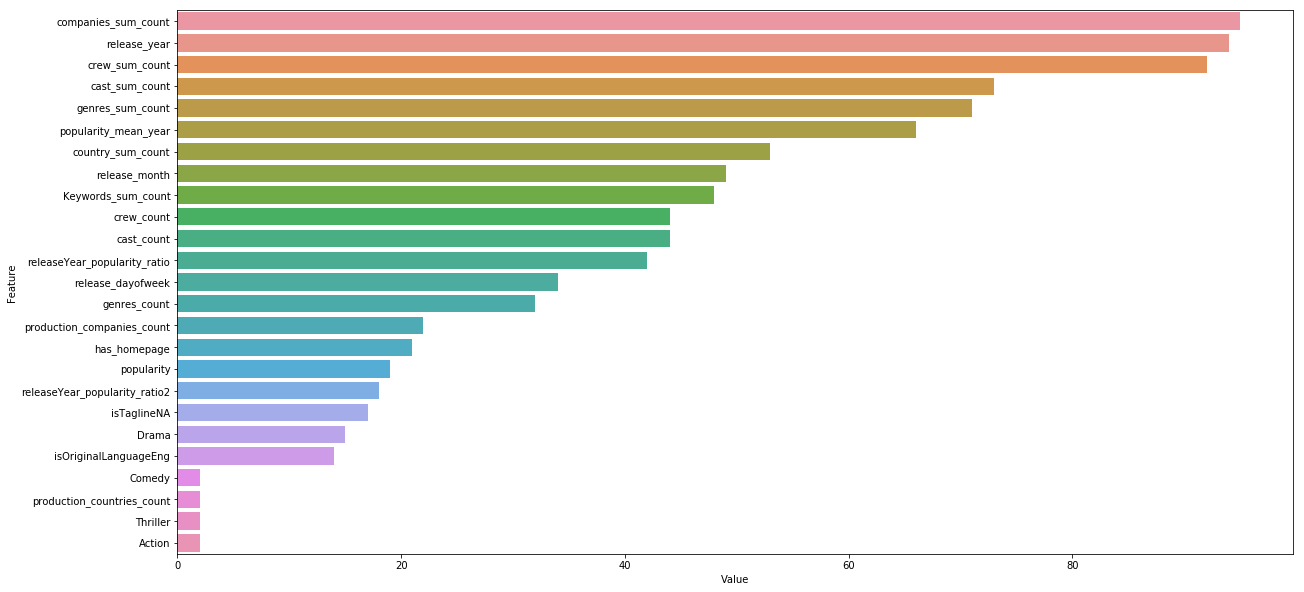

In [740]:
feature_imp = pd.DataFrame(sorted(zip(lgbm_model.feature_importances_, features)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False));

### Validation

In [741]:
loss(lgbm_model.predict(val[features]), np.log(val.revenue))

2.185863413496643

## xbgoost

In [742]:
params = {
    'objective': 'reg:linear', 
    'eta': 0.01, 
    'max_depth': 3, 
    'subsample': 0.6, 
    'colsample_bytree': 0.7,  
    'eval_metric': 'rmse', 
    'seed': 127, 
    'silent': True,
}

record = dict()

xgboost = xgb.train(
        params, 
        xgb.DMatrix(train_main[features], np.log(train_main.revenue.values)), 
        100000,
        [(xgb.DMatrix(train_main[features], np.log(train_main.revenue.values)), 'train'), 
         (xgb.DMatrix(val[features], np.log(val.revenue)), 'valid')], 
        verbose_eval=False,
        early_stopping_rounds=20,
        callbacks = [xgb.callback.record_evaluation(record)])

best_score_index = np.argmin(np.array(record['valid']['rmse']))
xgboost, record['valid']['rmse'][best_score_index]

(<xgboost.core.Booster at 0x7fc9c3b0c9e8>, 2.203201)

In [743]:
predicted = xgboost.predict(xgb.DMatrix(train_main[features]))
loss(predicted, np.log(train_main.revenue.values))

1.9394777207069025

### Validation

In [694]:
loss(xgboost.predict(xgb.DMatrix(val[features])), np.log(val.revenue))

2.196721786854214

## CatBoostRegressor

In [695]:
cat = CatBoostRegressor(iterations=100000,
                        learning_rate=0.04,
                        depth=5,
                        eval_metric='RMSE',
                        bagging_temperature = 0.2,
                        metric_period = None,
                        early_stopping_rounds=50)

cat.fit(train_main[features], np.log(train_main.revenue.values), 
                                     eval_set=(val[features], np.log(val.revenue)), 
                                     use_best_model=True, 
                                     verbose=False)
cat

In [696]:
predicted = cat.predict(train_main[features])
loss(predicted, np.log(train_main.revenue.values))

2.211835912515736

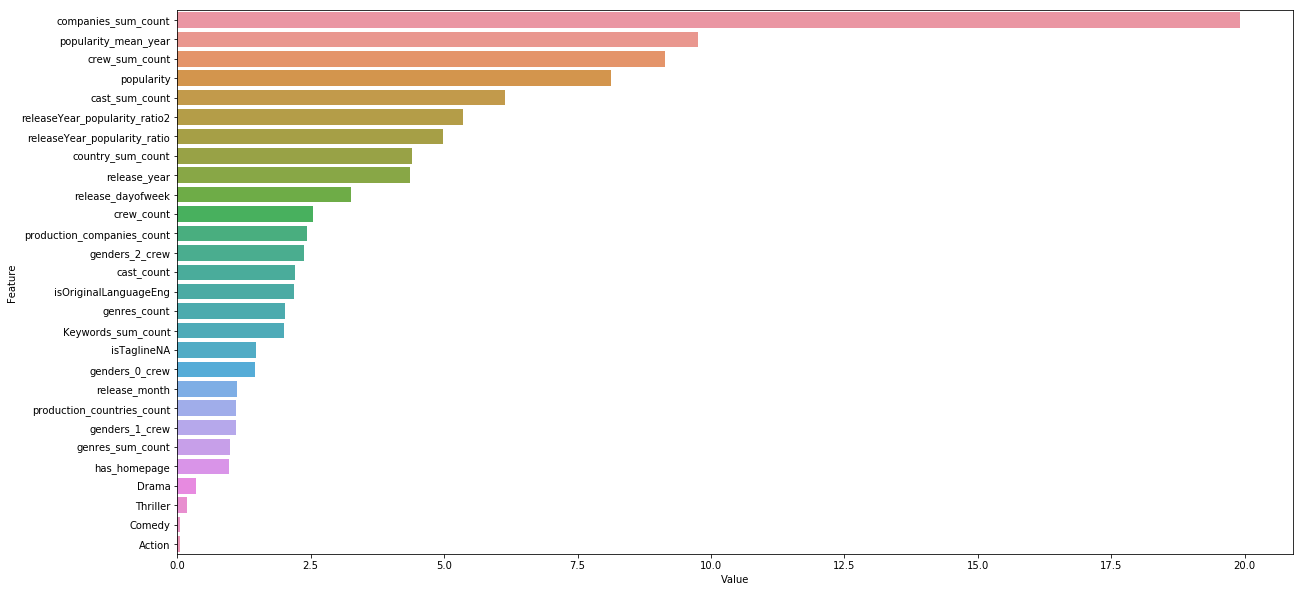

In [697]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, features)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False));

### Validation.

In [698]:
loss(cat.predict(val[features]), np.log(val.revenue))

2.2035400369511478

# predict without budget on test

## LGBMRegressor

In [699]:
lgbm_model = lgbm.LGBMRegressor(num_leaves=30, n_estimators=50, max_depth=5, learning_rate=0.1)
lgbm_model.fit(train[features], np.log(train.revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=50, n_jobs=-1, num_leaves=30, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [700]:
lgbm_no_budget_prediction = pd.Series(lgbm_model.predict(test[test.budget == 0][features]), 
                                      index=test[test.budget == 0].revenue.index)
lgbm_no_budget_prediction[:5]

id
3001    14.248482
3003    17.331086
3006    15.753290
3007    15.205368
3012    13.291434
dtype: float64

## CatBoostRegressor

In [701]:
cat.fit(train[features], np.log(train.revenue.values), 
                                     eval_set=(val[features], np.log(val.revenue)), 
                                     use_best_model=True, 
                                     verbose=False)
cat

In [702]:
cat_no_budget_prediction = pd.Series(cat.predict(test[test.budget == 0][features]), 
                                     index=test[test.budget == 0].revenue.index)
cat_no_budget_prediction[:5]

id
3001    14.717332
3003    16.829723
3006    15.153820
3007    15.526197
3012    14.384524
dtype: float64

## xgboost

In [703]:
xgboost = xgb.train(
        params, 
        xgb.DMatrix(train[features], np.log(train.revenue.values)), 
        1000, 
        verbose_eval=False)

best_score_index = np.argmin(np.array(record['valid']['rmse']))
xgboost, record['valid']['rmse'][best_score_index]

(<xgboost.core.Booster at 0x7fca029384a8>, 2.195922)

In [704]:
xgb_no_budget_prediction = pd.Series(cat.predict(test[test.budget == 0][features]), 
                                     index=test[test.budget == 0].revenue.index)
xgb_no_budget_prediction[:5]

id
3001    14.717332
3003    16.829723
3006    15.153820
3007    15.526197
3012    14.384524
dtype: float64

# predict with budget on train

In [745]:
features, data = add_budget_features(data, features)

In [746]:
train = data[:3000]
test = data[3000:]

train = train[train.budget != 0]
train_main = train[:1300]
val = train[1300:]

In [747]:
len(train_main), len(val)

(1300, 904)

## LGBMRegressor

In [748]:
lgbm_model = lgbm.LGBMRegressor(num_leaves=30, n_estimators=50, max_depth=5, learning_rate=0.1)
lgbm_model.fit(train_main[features], np.log1p(train_main.revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=50, n_jobs=-1, num_leaves=30, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [749]:
predicted = lgbm_model.predict(train_main[features])
loss(predicted, np.log(train_main.revenue.values))

1.241270786146789

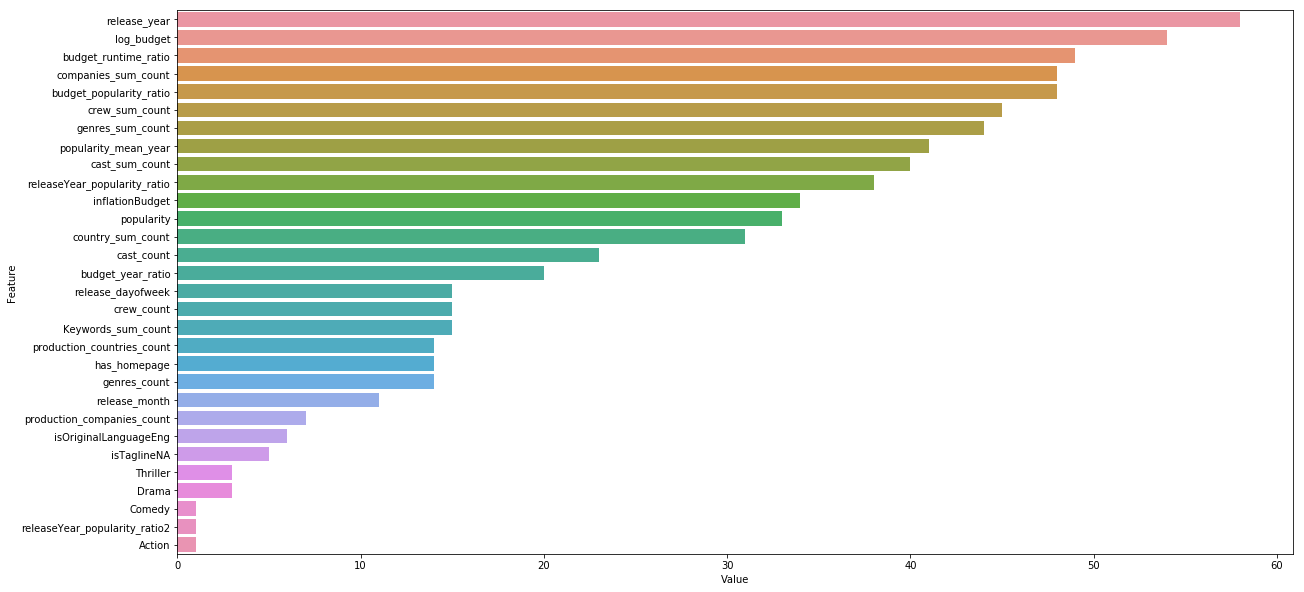

In [750]:
feature_imp = pd.DataFrame(sorted(zip(lgbm_model.feature_importances_, features)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False));

In [751]:
loss(lgbm_model.predict(val[features]), np.log(val.revenue))

1.5000454854562346

## CatBoostRegressor

In [755]:
cat.fit(train_main[features], np.log(train_main.revenue.values), 
                                     eval_set=(val[features], np.log(val.revenue)), 
                                     use_best_model=True, 
                                     verbose=False)
cat

In [756]:
predicted = cat.predict(train_main[features])
loss(predicted, np.log(train_main.revenue.values))

1.510505522576379

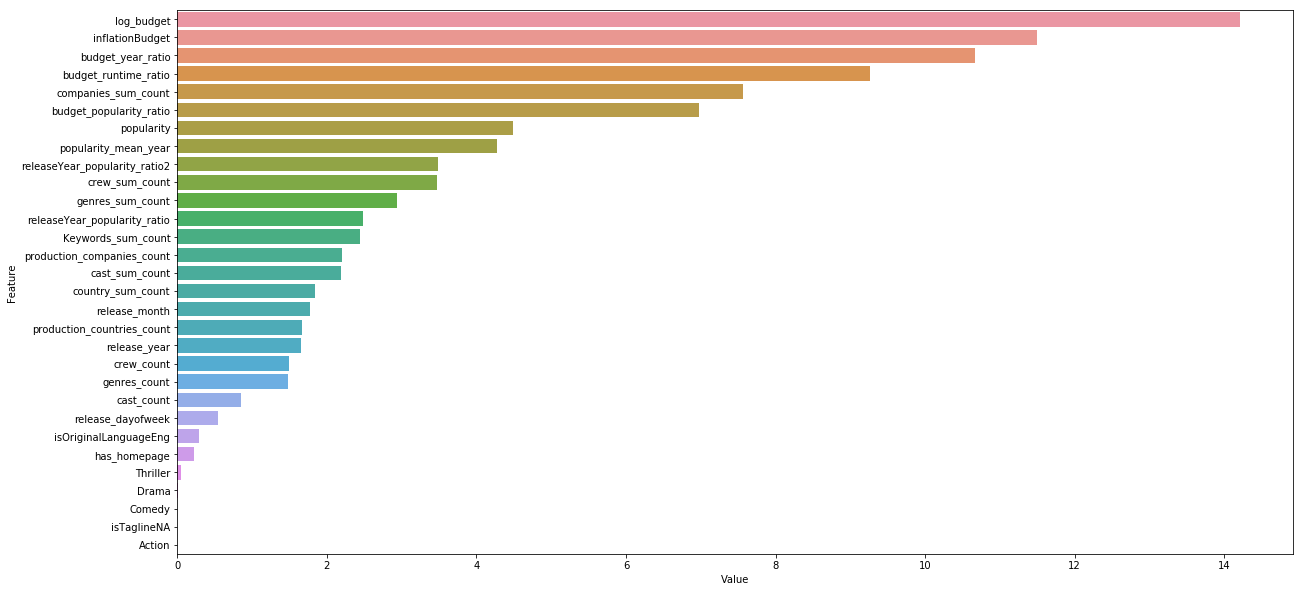

In [488]:
feature_imp = pd.DataFrame(sorted(zip(cat.feature_importances_, features)), columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False));

In [489]:
loss(cat.predict(val[features]), np.log(val.revenue))

1.5169137344887003

## xgboost

In [596]:
xgboost = xgb.train(
        params, 
        xgb.DMatrix(train_main[features], np.log(train_main.revenue.values)), 
        10000,
        [(xgb.DMatrix(train_main[features], np.log(train_main.revenue.values)), 'train'), 
         (xgb.DMatrix(val[features], np.log(val.revenue)), 'valid')], 
        verbose_eval=False,
        early_stopping_rounds=100,
        callbacks = [xgb.callback.record_evaluation(record)])

best_score_index = np.argmin(np.array(record['valid']['rmse']))
xgboost, record['valid']['rmse'][best_score_index]

(<xgboost.core.Booster at 0x7fca1b72b240>, 1.914917)

In [597]:
predicted = xgboost.predict(xgb.DMatrix(train_main[features]))
loss(predicted, np.log(train_main.revenue.values))

1.5324431008889872

In [598]:
loss(xgboost.predict(xgb.DMatrix(val[features])), np.log(val.revenue))

1.9164469689283061

# predict with budget on test

## LGBMRegressor

In [465]:
lgbm_model = lgbm.LGBMRegressor(num_leaves=15, n_estimators=100, max_depth=5, learning_rate=0.1)
lgbm_model.fit(train[train.budget != 0][features], np.log(train[train.budget != 0].revenue.values))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=5,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=15, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [466]:
lgbm_budget_prediction = pd.Series(lgbm_model.predict(test[test.budget != 0][features]),
                              index=test[test.budget != 0].revenue.index)
lgbm_budget_prediction[:5]

id
3002    14.679241
3004    15.100340
3005    14.356520
3008    17.895261
3009    16.269810
dtype: float64

## CatBoostRegressor

In [467]:
cat.fit(train[train.budget != 0][features], np.log(train[train.budget != 0].revenue.values), 
                                     eval_set=(val[features], np.log(val.revenue)), 
                                     use_best_model=True, 
                                     verbose=False)
cat

In [471]:
cat_budget_prediction = pd.Series(cat.predict(test[test.budget != 0][features]),
                                  index=test[test.budget != 0].revenue.index)
cat_budget_prediction[:5]

id
3002    14.720087
3004    14.607178
3005    14.434892
3008    17.954546
3009    16.152089
dtype: float64

## xgboost

In [606]:
xgboost = xgb.train(
        params, 
        xgb.DMatrix(train[train.budget != 0][features], np.log(train[train.budget != 0].revenue.values)), 
        10000,
        [(xgb.DMatrix(train_main[features], np.log(train_main.revenue.values)), 'train'), 
         (xgb.DMatrix(val[features], np.log(val.revenue)), 'valid')], 
        verbose_eval=False,
        early_stopping_rounds=1000,
        callbacks = [xgb.callback.record_evaluation(record)])

best_score_index = np.argmin(np.array(record['valid']['rmse']))
xgboost, record['valid']['rmse'][best_score_index]

(<xgboost.core.Booster at 0x7fca1b039198>, 5.77909)

In [607]:
xgb_budget_prediction = pd.Series(xgboost.predict(xgb.DMatrix(test[test.budget != 0][features])),
                                  index=test[test.budget != 0].revenue.index)
xgb_budget_prediction[:5]

id
3002    14.442338
3004    15.481557
3005    13.921092
3008    17.659189
3009    16.168646
dtype: float32

# combining with budget and with no budget predictions

In [608]:
len(xgb_budget_prediction) + len(xgb_no_budget_prediction), len(test)

(4398, 4398)

In [609]:
sub = pd.read_csv(os.path.join("kaggle_dataset", "sample_submission.csv"))
sub = sub.set_index("id")

In [610]:
sub.revenue.update(xgb_no_budget_prediction)
sub.revenue.update(xgb_budget_prediction)

In [611]:
sub.revenue = np.exp(sub.revenue)
sub.revenue[:5]

id
3001    5.053318e+05
3002    1.871663e+06
3003    1.079672e+07
3004    5.291207e+06
3005    1.111357e+06
Name: revenue, dtype: float64

In [612]:
sub.to_csv("submission.csv")